This notebook visualize the raw data (only DC filter applied), real time from the armband device

In [2]:
cd ..

c:\Code\Armband


In [3]:
import os
import time
import numpy as np
from scipy.fftpack import fft

import mindrove_brainflow
from mindrove_brainflow.data_filter import FilterTypes, AggOperations
from mindrove_brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds, BrainFlowError

from tqdm.notebook import tqdm
import datetime
from matplotlib import pyplot as plt

from utils.armband import init
from utils.visualize import showMe
from utils.signal import DCFilter
from config.armband import *
# %matplotlib inline

%load_ext autoreload
%autoreload 2

In [6]:
board = init()
sample_rate = board.get_sampling_rate(16)

Device ready (sampling rate: 500hz)


Live

(500,)


c:\Users\Asura\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(500,)


c:\Users\Asura\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(500,)


c:\Users\Asura\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(500,)


c:\Users\Asura\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(500,)


c:\Users\Asura\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


KeyboardInterrupt: 

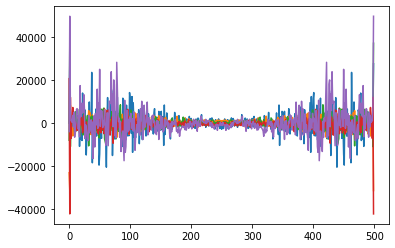

In [7]:
board.start_stream(450000) 
while(True):
    #time.sleep(200/1000)
    time.sleep(1.1)
    data = board.get_board_data()
    data = DCFilter(data)
    data = data[
        :8, -sample_rate * 1 :
    ]  # keep the data of the emg channels only, and remove data over the trial length
    #fft = DataFilter.perform_fft(data[channel], WindowOperations.NO_WINDOW.value)
    
    fft_data = fft(data[0])
    print(fft_data.shape)
    plt.plot(fft_data)
    plt.show()
    #print(data.shape)
    #print(fft_data.shape)
    # len of fft_data is N / 2 + 1
    # restored_fft_data = DataFilter.perform_ifft(fft_data)
    # print("restored_fft_data", restored_fft_data)
    
    #showMe(data[:8,:1000], range=[-50000,50000], clear = True)
    #showMe(fft_data[:8,:1000], range=[-50000,50000], clear = True)